# REGRESSION LOGISTIQUE

In [6]:
#Importing libraries
import numpy as np
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
#seaborn + matplotlib for graphical plot
#seaborn allows to have advanced graphical content
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

#import relevant libraries de la regression logistique
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [7]:
df= pd.read_csv('/content/logistic_regression_dataset.csv')

In [8]:
df.head(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1.0
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0.0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1.0
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0.0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0.0
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0.0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0.0


In [9]:
df.tail(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4228,4228,47,NaN,F,NO,0.0,0.0,0,0,0,279.0,154.5,103.5,27.12,79.0,60.0,NaN
4229,4229,47,1.0,F,NO,0.0,0.0,0,0,0,278.0,156.0,96.0,27.86,80.0,70.0,NaN
4230,4230,67,1.0,M,NO,0.0,0.0,0,0,0,203.0,122.0,74.0,15.54,96.0,79.0,NaN
4231,4231,62,1.0,M,YES,20.0,0.0,0,1,0,270.0,145.5,87.5,23.88,81.0,67.0,NaN
4232,4232,49,3.0,F,YES,4.0,0.0,0,1,0,227.0,150.0,91.0,24.30,88.0,83.0,NaN
4233,4233,46,3.0,F,NO,0.0,0.0,0,0,0,277.0,122.5,77.5,27.42,63.0,77.0,NaN
4234,4234,58,2.0,F,NO,0.0,0.0,0,0,0,190.0,132.0,67.0,23.08,65.0,70.0,NaN
4235,4235,55,1.0,M,NO,0.0,0.0,0,0,0,199.0,134.0,80.0,26.41,120.0,NaN,NaN
4236,4236,45,3.0,F,NO,0.0,0.0,0,1,0,231.0,157.5,104.5,22.86,75.0,92.0,NaN
4237,4237,56,NaN,M,YES,25.0,0.0,0,0,0,255.0,138.0,80.0,23.44,67.0,79.0,NaN


In [10]:
df.shape

(4238, 17)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   sex              4238 non-null   object 
 4   is_smoking       4238 non-null   object 
 5   cigsPerDay       4209 non-null   float64
 6   BPMeds           4185 non-null   float64
 7   prevalentStroke  4238 non-null   int64  
 8   prevalentHyp     4238 non-null   int64  
 9   diabetes         4238 non-null   int64  
 10  totChol          4188 non-null   float64
 11  sysBP            4238 non-null   float64
 12  diaBP            4238 non-null   float64
 13  BMI              4219 non-null   float64
 14  heartRate        4237 non-null   float64
 15  glucose          3850 non-null   float64
 16  TenYearCHD       3390 non-null   float64
dtypes: float64(10)

In [12]:
df.isnull().sum()

id                   0
age                  0
education          105
sex                  0
is_smoking           0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD         848
dtype: int64


education          105****

cigsPerDay          29=====

BPMeds              53====

totChol             50****

heartRate            1****

glucose            388*****

TenYearCHD         848====


In [13]:
#Pour remplacer nos valeurs manquantes, on utilise l'imputation de la moyenne
df['education'].fillna(df['education'].mean(), inplace=True)

In [14]:
df['totChol'].fillna(df['totChol'].mean(), inplace=True)

In [15]:
df['heartRate'].fillna(df['heartRate'].mean(), inplace=True)

In [16]:
df['glucose'].fillna(df['glucose'].mean(), inplace=True)

In [17]:
df['BMI'].fillna(df['BMI'].mean(), inplace=True)

In [18]:
#Pour les variables categorielles
df.describe(include='O')

,sex,is_smoking
count,4238,4238
unique,2,2
top,F,NO
freq,2419,2144


In [19]:
#Utilisons la fonction d'encodeur d'etiquette  dans la bibliotheque Sklearn pour transformer les variavbles categorielles manquantes
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['cigsPerDay']=encoder.fit_transform(df["cigsPerDay"])
df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.00000,F,YES,3,0.0,0,0,0,221.0,148.0,85.0,25.802008,90.0,80.000000,1.0
1,1,36,4.00000,M,NO,0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.000000,0.0
2,2,46,1.00000,F,YES,10,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.000000,0.0
3,3,50,1.00000,M,YES,20,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.000000,1.0
4,4,64,1.00000,F,YES,24,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,4233,46,3.00000,F,NO,0,0.0,0,0,0,277.0,122.5,77.5,27.420000,63.0,77.000000,NaN
4234,4234,58,2.00000,F,NO,0,0.0,0,0,0,190.0,132.0,67.0,23.080000,65.0,70.000000,NaN
4235,4235,55,1.00000,M,NO,0,0.0,0,0,0,199.0,134.0,80.0,26.410000,120.0,81.966753,NaN
4236,4236,45,3.00000,F,NO,0,0.0,0,1,0,231.0,157.5,104.5,22.860000,75.0,92.000000,NaN


In [20]:
#Utilisons la fonction d'encodeur d'etiquette  dans la bibliotheque Sklearn pour transformer les variavbles categorielles manquantes
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['BPMeds']=encoder.fit_transform(df["BPMeds"])

In [21]:
#Utilisons la fonction d'encodeur d'etiquette  dans la bibliotheque Sklearn pour transformer les variavbles categorielles manquantes
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['TenYearCHD']=encoder.fit_transform(df["TenYearCHD"])

In [22]:
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [23]:
df.head(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3,0,0,0,0,221.0,148.0,85.0,25.802008,90.0,80.000000,1
1,1,36,4.0,M,NO,0,0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.000000,0
2,2,46,1.0,F,YES,10,0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.000000,0
3,3,50,1.0,M,YES,20,0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.000000,1
4,4,64,1.0,F,YES,24,0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.000000,0
5,5,61,3.0,F,NO,0,0,0,1,0,272.0,182.0,121.0,32.800000,85.0,65.000000,1
6,6,61,1.0,M,NO,0,0,0,1,0,238.0,232.0,136.0,24.830000,75.0,79.000000,0
7,7,36,4.0,M,YES,25,0,0,0,0,295.0,102.0,68.0,28.150000,60.0,63.000000,0
8,8,41,2.0,F,YES,20,2,0,0,0,220.0,126.0,78.0,20.700000,86.0,79.000000,0
9,9,55,2.0,F,NO,0,0,0,1,0,326.0,144.0,81.0,25.710000,85.0,81.966753,0


##Feature Engeneering

Utilisons la matrice de correlation pour la selection des fonctionnalités

<ipython-input-24-1612d67d844b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


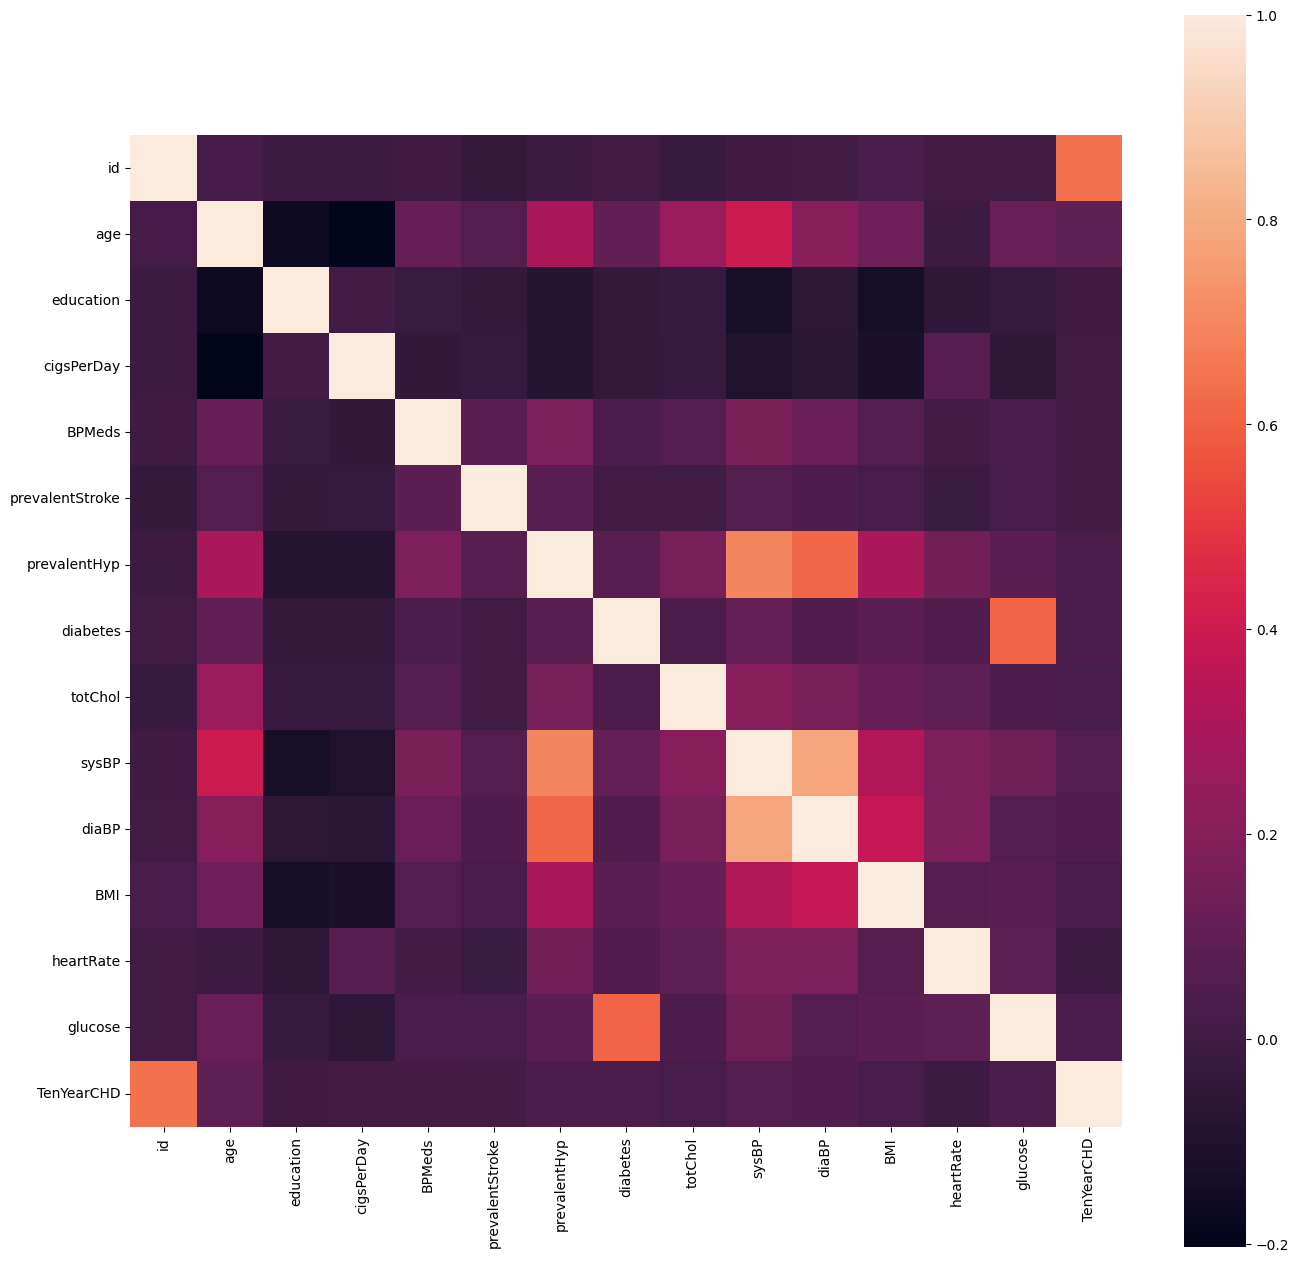

In [24]:
corrmat = df.corr()
plt.subplots(figsize=(16, 16))
sns.heatmap(corrmat, square=True);

La figure représente la matrice de corrélation de toutes les caractéristiques.

La taille de la matrice de corrélation est de 17 x 17 car nous devons croiser 17 caractéristiques avec elles.

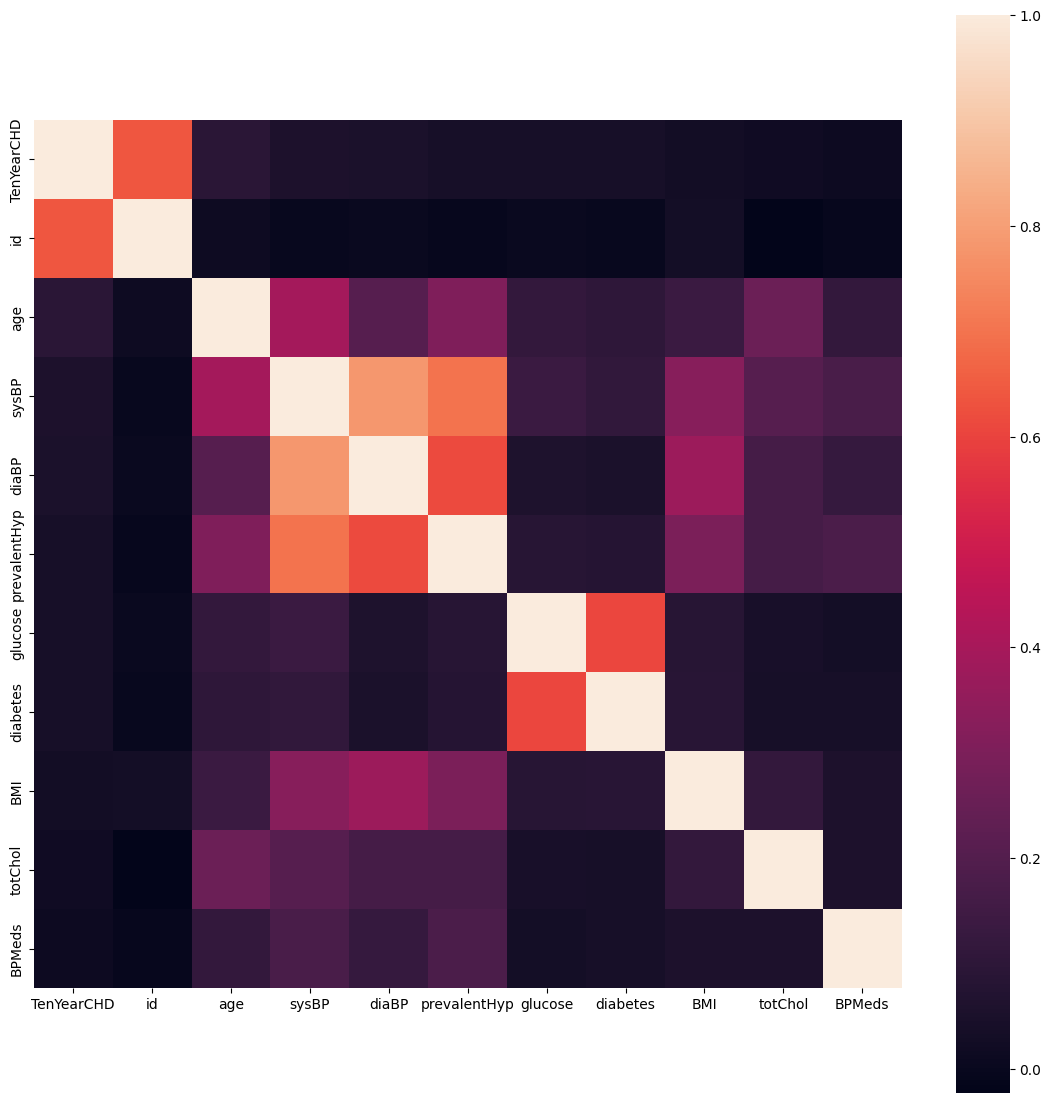

In [25]:
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'TenYearCHD')['TenYearCHD'].index
plt.subplots(figsize=(14, 14))
sns.heatmap(df[cols].corr(), square=True);

Dans cette matrice, nous avons les 10 caractéristiques les plus corrélées puisque l'id peut ne pas etre prise en compte :

TenYearCHD

age

syBP

diaBP

prevalentHyp

glucose

diabetes

BMI

totChol

BPMeds

Préparation des données de régression logistique

## 1. Appliquons la régression logistique.




In [26]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x = df[['age', 'sysBP','diaBP', 'prevalentHyp','glucose', 'diabetes', 'BMI','totChol','BPMeds']]
y = df['TenYearCHD']

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.66


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Notre modele predit 66 % des cas correctement prévus se sont révélés positifs.

## 2. Utilisons une matrice de confusion pour valider notre modèle.



<Axes: xlabel='Predicted', ylabel='Actual'>

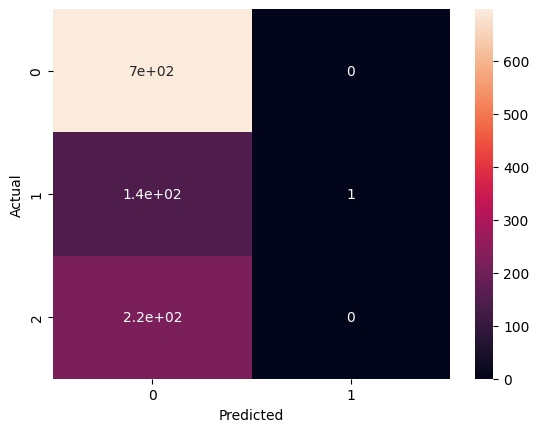

In [28]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

Valeurs de TN, FP, FN, TP :

 TP: 1400

 FP:700+1

 FN: 0

 TN: 2200

Plus d'interpretation voyons le rapport de classement

Rapport de classement

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79       698
           1       1.00      0.01      0.01       145
           2       0.00      0.00      0.00       217

    accuracy                           0.66      1060
   macro avg       0.55      0.34      0.27      1060
weighted avg       0.57      0.66      0.53      1060



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Nous pouvons facilement calculer la Précision et le Rappel pour notre modèle en introduisant les valeurs dans les questions ci-dessus :

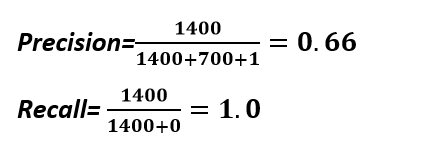

66 % des cas correctement prévus se sont révélés positifs. Alors que 1.0 % des cas positifs ont été prédits avec succès par notre modèle. Vous remarquez d'ailleurs que l'on retrouve ces valeurs de la Précision et du Rappel dans le "rapport de classification"  et que ces valeurs sont données ici pour le cas dit positif, c'est à dire 0. On voit bien que si l'on parle de 1 c'est différent. Mais ici, comme on l'a dit, on préfère s'intéresser au cas 0.

La macro avg est la moyenne de la précision/du rappel/du F1-score. Et weighted avg est la moyenne pondérée.

##3. Une autre matrice de validation pour la classification est ROC/AUC. Faites vos recherches à leur sujet, expliquons-les et appliquons-les dans notre cas.

Il peut être plus souple de prédire les probabilités d'une observation appartenant à chaque classe dans un problème de classification plutôt que de prédire directement les classes.

Cette flexibilité vient de la façon dont les probabilités peuvent être interprétées en utilisant différents seuils qui permettent à l'opérateur du modèle de faire des compromis entre les préoccupations relatives aux erreurs commises par le modèle, comme le nombre de faux positifs par rapport au nombre de faux négatifs. Cela est nécessaire lorsque l'on utilise des modèles où le coût d'une erreur est supérieur au coût d'autres types d'erreurs.

Deux outils de diagnostic qui aident à l'interprétation des prévisions probabilistes pour les problèmes de modélisation prédictive de la classification binaire (à deux classes) sont les courbes ROC et les courbes de précision de rappel.

Les courbes ROC résument le compromis entre le taux positif vrai et le taux positif faux pour un modèle prédictif utilisant différents seuils de probabilité.
Les courbes de précision-rappel résument le compromis entre le taux positif réel et la valeur prédictive positive pour un modèle prédictif utilisant différents seuils de probabilité.
Les courbes ROC sont appropriées lorsque les observations sont équilibrées entre chaque classe, tandis que les courbes de précision-rappel sont appropriées pour les ensembles de données déséquilibrés.
Ce tutoriel est divisé en 6 parties :

Prévoir les probabilités

Que sont les courbes ROC ?

Courbes ROC et AUC en Python

Que sont les courbes de rappel de précision ?

Courbes de rappel de précision et AUC en python

Quand utiliser les courbes ROC ou les courbes de rappel de précision ?

***Prévoir les probabilités***

Dans un problème de classification, nous pouvons décider de prédire directement les valeurs de classe.

Il peut aussi être plus souple de prévoir les probabilités pour chaque classe. La raison en est de pouvoir choisir et même calibrer le seuil d'interprétation des probabilités prédites.

Par exemple, une valeur par défaut pourrait être d'utiliser un seuil de 0,5, ce qui signifie qu'une probabilité dans l'intervalle [0.0, 0.49] est un résultat négatif (0) et une probabilité dans l'intervalle [0.5, 1.0] est un résultat positif (1).

Ce seuil peut être ajusté afin de régler le comportement du modèle pour un problème spécifique. Un exemple serait de réduire davantage l'un ou l'autre type d'erreur.

Lorsque l'on fait une prédiction pour un problème de classification binaire ou à deux classes, il y a deux types d'erreurs que l'on peut faire.

Faux positif. Prédire un événement alors qu'il n'y en a pas eu. On devrait d'ailleurs dire plutôt "positif faux"
Faux négatif. Ne pas prédire un événement alors qu'il y a eu un événement. De même, on devrait plutôt dire "négatif faux"
En prédisant des probabilités et en calibrant un seuil, l'opérateur du modèle peut choisir un équilibre entre ces deux préoccupations.

***Que sont les courbes ROC ?***

Un outil utile pour prédire la probabilité d'un résultat binaire est la courbe des caractéristiques de fonctionnement du récepteur, ou courbe ROC (Receiver Operating Characteristic).

Il s'agit d'un tracé du taux de faux positifs (axe des x) par rapport au taux de vrais positifs (axe des y) pour un certain nombre de valeurs seuils candidates différentes entre 0,0 et 1,0. En d'autres termes, elle représente le taux de fausses alarmes par rapport au taux de réussite.

Le taux de vrais positifs est calculé comme le nombre de vrais positifs divisé par la somme du nombre de vrais positifs et du nombre de faux négatifs. Il décrit la capacité du modèle à prédire la classe positive lorsque le résultat réel est positif.

Taux de vrais positifs = vrais positifs / (vrais positifs + faux négatifs)

Le véritable taux positif est également appelé sensibilité.

Sensibilité = vrais positifs / (vrais positifs + faux négatifs)

Le taux de faux positifs est calculé comme le nombre de faux positifs divisé par la somme du nombre de faux positifs et du nombre de vrais négatifs. Il est également appelé taux de fausses alertes car il résume la fréquence à laquelle une classe positive est prédite alors que le résultat réel est négatif.

Taux de faux positifs = faux positifs / (faux positifs + vrais négatifs)

Le taux de faux positifs est également appelé spécificité inversée, où la spécificité est le nombre total de vrais négatifs divisé par la somme du nombre de vrais négatifs et de faux positifs.

Spécificité = Vrais négatifs / (Vrais négatifs + Faux positifs)

Où : Taux de faux positifs = 1 - Spécificité

La courbe ROC est un outil utile pour plusieurs raisons :

Les courbes de différents modèles peuvent être comparées directement en général ou pour différents seuils.
L'aire sous la courbe (AUC) peut être utilisée comme un résumé de la compétence du modèle.
La forme de la courbe contient beaucoup d'informations, notamment ce qui pourrait nous intéresser le plus pour un problème, le taux de faux positifs attendus et le taux de faux négatifs.

***Courbes ROC et AUC en Python***

Nous pouvons tracer une courbe ROC pour un modèle en Python en utilisant la fonction roc_curve() scikit-learn. La fonction prend à la fois les résultats réels (0,1) de l'ensemble de tests et les probabilités prédites pour la classe 1. La fonction renvoie les taux de faux positifs pour chaque seuil, les taux de vrais positifs pour chaque seuil et les seuils.

L'AUC (Area Under Curve ROC) pour le ROC peut être calculée à l'aide de la fonction roc_auc_score().

Comme la fonction roc_curve(), la fonction AUC prend à la fois les résultats réels (0,1) de l'ensemble de tests et les probabilités prédites pour la classe 1. Elle renvoie un score AUC compris entre 0,0 et 1,0 pour les catégories "aucune compétence" et "compétence parfaite" respectivement.

Illustration avec la  matrice de confusion

              precision    recall  f1-score   support

           0       0.66      1.00      0.79       698
           1       1.00      0.01      0.01       145
           2       0.00      0.00      0.00       217

    accuracy                           0.66      1060
   macro avg       0.55      0.34      0.27      1060
weighted avg       0.57      0.66      0.53      1060



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


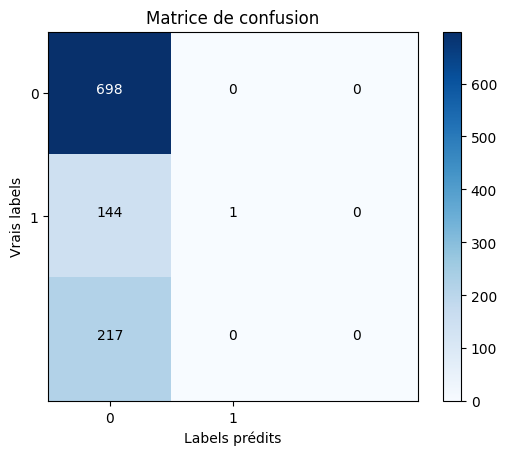

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools

y_pred  = logreg.predict(x_test)

print(classification_report(y_test, y_pred))

cnf_matrix= confusion_matrix(y_test,y_pred)

classes = range(0,2)

plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

Ces resultats viennent de confirmer le meme recall et la precision du modele precedent.

***Courbes de rappel de précision en python***

La précision et le rappel peuvent être calculées dans Scikit-learn.

La précision et le rappel peuvent être calculés pour les seuils à l'aide de la fonction precision_recall_curve() qui prend les valeurs de sortie réelles et les probabilités pour la classe positive comme sortie et renvoie les valeurs de précision, de rappel et de seuil.

La F-mesure peut être calculée en appelant la fonction f1_score() qui prend en argument les valeurs de classe réelles et les valeurs de classe prédites.

L'aire sous la courbe précision-rappel peut être approchée en appelant la fonction auc() et en lui passant les valeurs de rappel (x) et de précision (y) calculées pour chaque seuil.

Lorsque l'on trace la précision et le rappel pour chaque seuil sous forme de courbe, il est important que le rappel soit fourni sous forme d'axe des x et la précision sous forme d'axe des y.

Appliquons  le calcul des courbes de précision et de rappel pour notre modèle de régression logistique.

Logistic: f1=0.841 auc=0.898


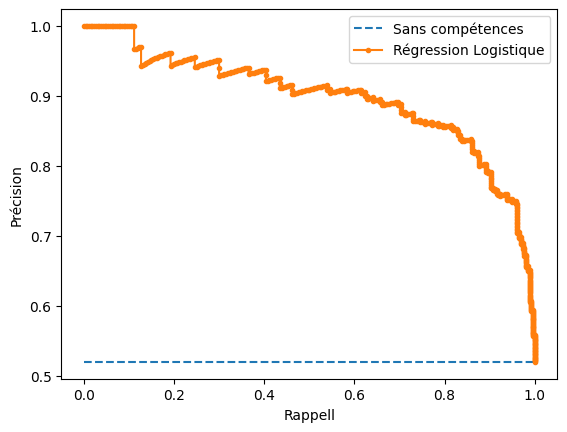

In [35]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# generate 2 class dataset
x, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(x_train, y_train)
# predict probabilities
lr_probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(x_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sans compétences')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Régression Logistique')
# axis labels
pyplot.xlabel('Rappell')
pyplot.ylabel('Précision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

ci-dessus, le tracé de la courbe précision-rappel est créé, montrant la précision/le rappel pour chaque seuil pour un modèle de régression logistique (orange) par rapport à un modèle sans compétence (bleu).

Logistique : F-Mesure=0.841 auc=0.898